<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Outliers/Act3.2/Rio%20de%20Janeiro/Parte%202/3_2_Parte2_Identificacion_Valores_Atipicos_Rio_De_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Importamos las libreerias pandas, numpy y matplotlib respectivamente
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
cualitativas=pd.read_csv('Cualitativo_Limpio.csv')
cuantitativas=pd.read_csv('Cuantitativas_Limpio.csv')

In [40]:
cualitativas.drop('Unnamed: 0',axis=1,inplace=True)
cuantitativas.drop('Unnamed: 0',axis=1,inplace=True)


Metodo que detecta mayor numero de outliers: Rango intercuartílico y gráficamente se reresenta con caja y bigote

<Figure size 1500x800 with 0 Axes>

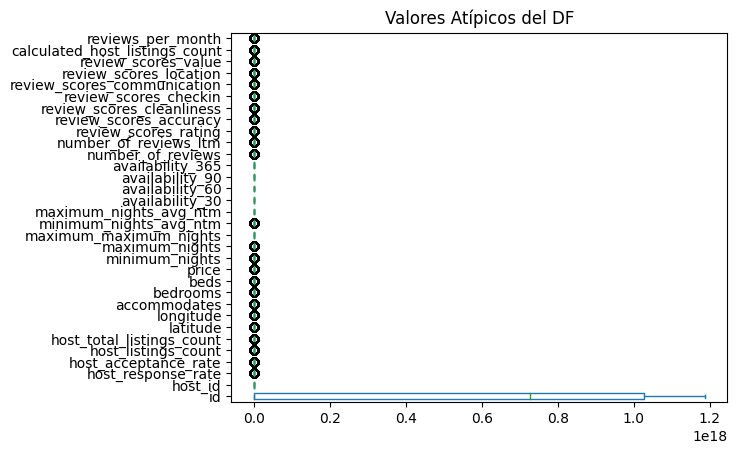

In [41]:
#Realizamos diagrama de caja o bigote de cada columna del DF
fig= plt.figure(figsize=(15 ,8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atípicos del DF')
plt.show() #Dibujamos el diagrama

# Primer Metodo **Procedimiento "Desviación Estandar" para eliminar outliers en el DF**

In [42]:
#Método aplicando desvest. Encuentro los valores extremos
# 3 desviaciones estandar para la izquierda y derecha para encontrar los límites
y=cuantitativas
Limite_Superior= y.mean()+ 3*y.std()
Limite_Inferior= y.mean()- 3*y.std()
print('-Límite superior permitido\n', Limite_Superior,'\n')
print('-Límite inferior permitido\n', Limite_Inferior)

-Límite superior permitido
 id                                1.994590e+18
host_id                           7.676769e+08
host_response_rate                1.572898e+00
host_acceptance_rate              1.626787e+00
host_listings_count               3.035435e+02
host_total_listings_count         4.825792e+02
latitude                         -2.286304e+01
longitude                        -4.295032e+01
accommodates                      1.102649e+01
bedrooms                          4.693386e+00
beds                              8.487017e+00
price                             1.749287e+04
minimum_nights                    4.629413e+01
maximum_nights                    1.658567e+03
maximum_maximum_nights            1.907699e+03
minimum_nights_avg_ntm            4.237388e+01
maximum_nights_avg_ntm            1.874099e+03
availability_30                   5.333372e+01
availability_60                   1.045433e+02
availability_90                   1.512772e+02
availability_365                

In [43]:
#Obtenemos los datos y los Outliers se convierten en nulos en el DF
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,17878,68997,1.0,1.00,2.0,5.0,-22.965990,-43.179400,5.0,2.0,...,23.0,4.71,4.77,4.64,4.84,4.91,4.77,4.67,1.0,1.88
1,25026,102840,1.0,0.82,1.0,5.0,-22.977350,-43.191050,3.0,1.0,...,23.0,4.73,4.71,4.79,4.82,4.92,4.84,4.62,1.0,1.70
2,220377,1142424,1.0,0.47,3.0,3.0,-22.928800,-43.240460,2.0,1.0,...,1.0,5.00,5.00,5.00,5.00,4.80,4.80,5.00,3.0,0.03
3,35764,153691,1.0,0.98,1.0,2.0,-22.981070,-43.191360,2.0,1.0,...,36.0,4.91,4.94,4.92,4.97,4.95,4.94,4.89,1.0,2.85
4,223073,503995,1.0,1.00,7.0,8.0,-22.982800,-43.204670,2.0,1.0,...,17.0,4.81,4.83,4.74,4.95,4.98,4.97,4.73,7.0,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34659,1185514583461005119,378545175,1.0,0.97,18.0,19.0,-22.973958,-43.187504,6.0,3.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,18.0,1.10
34660,1185571519517844533,146028319,1.0,1.00,1.0,1.0,-22.951419,-43.192850,3.0,1.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,1.0,1.10
34661,1185607754513758247,378545175,1.0,0.97,18.0,19.0,-22.982100,-43.222518,3.0,2.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,18.0,1.10
34662,1185618650054465875,450027329,0.9,0.80,1.0,1.0,-22.967756,-43.186767,3.0,2.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,1.0,1.10


In [44]:
#Corroboramos valores nulos del DF
valores_nulos= data3.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_response_rate,1614
host_acceptance_rate,0
host_listings_count,222
host_total_listings_count,446
latitude,455
longitude,420
accommodates,644
bedrooms,497


In [45]:
#Reemplazamos valores atípicos (nulos) del DF con "mean"
#Realizamos copia del DF
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,17878,68997,1.0,1.00,2.0,5.0,-22.965990,-43.179400,5.0,2.0,...,23.0,4.71,4.77,4.64,4.84,4.91,4.77,4.67,1.0,1.88
1,25026,102840,1.0,0.82,1.0,5.0,-22.977350,-43.191050,3.0,1.0,...,23.0,4.73,4.71,4.79,4.82,4.92,4.84,4.62,1.0,1.70
2,220377,1142424,1.0,0.47,3.0,3.0,-22.928800,-43.240460,2.0,1.0,...,1.0,5.00,5.00,5.00,5.00,4.80,4.80,5.00,3.0,0.03
3,35764,153691,1.0,0.98,1.0,2.0,-22.981070,-43.191360,2.0,1.0,...,36.0,4.91,4.94,4.92,4.97,4.95,4.94,4.89,1.0,2.85
4,223073,503995,1.0,1.00,7.0,8.0,-22.982800,-43.204670,2.0,1.0,...,17.0,4.81,4.83,4.74,4.95,4.98,4.97,4.73,7.0,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34659,1185514583461005119,378545175,1.0,0.97,18.0,19.0,-22.973958,-43.187504,6.0,3.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,18.0,1.10
34660,1185571519517844533,146028319,1.0,1.00,1.0,1.0,-22.951419,-43.192850,3.0,1.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,1.0,1.10
34661,1185607754513758247,378545175,1.0,0.97,18.0,19.0,-22.982100,-43.222518,3.0,2.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,18.0,1.10
34662,1185618650054465875,450027329,0.9,0.80,1.0,1.0,-22.967756,-43.186767,3.0,2.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,1.0,1.10


In [46]:
#Corroboramos valores nulos del DF
valores_nulos= data_clean.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_response_rate,0
host_acceptance_rate,0
host_listings_count,0
host_total_listings_count,0
latitude,0
longitude,0
accommodates,0
bedrooms,0


<Figure size 1500x1800 with 0 Axes>

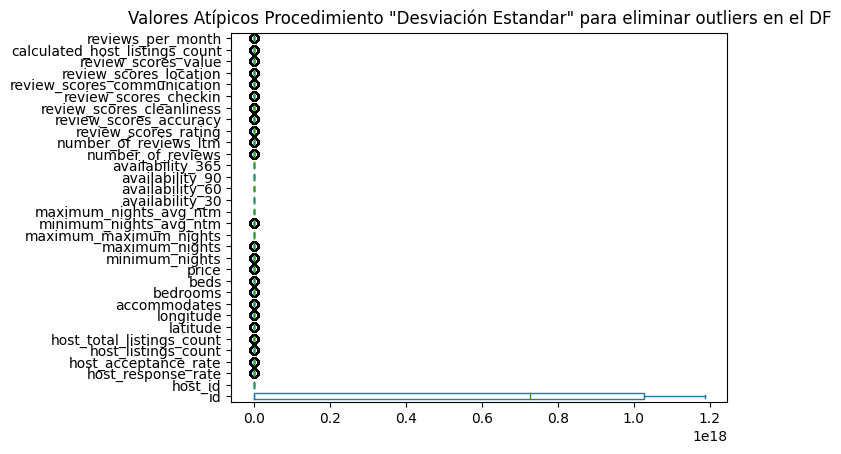

In [47]:
#Realizamos diagrama de caja o bigote de cada columna del DF
fig= plt.figure(figsize=(15 ,18))
data_clean.plot(kind='box', vert=False)
plt.title('Valores Atípicos Procedimiento "Desviación Estandar" para eliminar outliers en el DF')
plt.show() #Dibujamos el diagrama

# Segundo Metodo **Procedimiento "Cuantiles" para eliminar outliers en el DF**



In [48]:
y=cuantitativas

percentiles25=y.quantile(0.25) #Q1
percentiles75=y.quantile(0.75) #Q3
iqr= percentiles75-percentiles25

Limite_Superior_iqr=percentiles75 + 1.5*iqr
Limite_Inferior_iqr=percentiles25- 1.5*iqr
print("Límite superior permitido: \n",Limite_Superior_iqr)
print("\nLímite inferior permitido: \n",Limite_Inferior_iqr)

Límite superior permitido: 
 id                                2.567806e+18
host_id                           8.868417e+08
host_response_rate                1.150000e+00
host_acceptance_rate              1.440000e+00
host_listings_count               1.350000e+01
host_total_listings_count         1.850000e+01
latitude                         -2.291425e+01
longitude                        -4.300865e+01
accommodates                      9.500000e+00
bedrooms                          3.500000e+00
beds                              6.000000e+00
price                             1.220000e+03
minimum_nights                    6.000000e+00
maximum_nights                    8.225000e+02
maximum_maximum_nights            2.677500e+03
minimum_nights_avg_ntm            5.550000e+00
maximum_nights_avg_ntm            2.677500e+03
availability_30                   5.600000e+01
availability_60                   1.010000e+02
availability_90                   1.475000e+02
availability_365               

In [49]:
#Obtenemos datos limpios del DF
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,17878,68997,1.0,1.00,2.0,5.0,-22.965990,-43.179400,5.0,2.0,...,23.0,4.71,4.77,4.64,4.84,4.91,4.77,4.67,1.0,1.88
1,25026,102840,1.0,0.82,1.0,5.0,-22.977350,-43.191050,3.0,1.0,...,23.0,4.73,4.71,4.79,4.82,4.92,4.84,4.62,1.0,1.70
2,220377,1142424,1.0,0.47,3.0,3.0,-22.928800,-43.240460,2.0,1.0,...,1.0,5.00,5.00,5.00,5.00,4.80,4.80,5.00,3.0,0.03
3,35764,153691,1.0,0.98,1.0,2.0,-22.981070,-43.191360,2.0,1.0,...,NaN,4.91,4.94,4.92,4.97,4.95,4.94,4.89,1.0,NaN
4,223073,503995,1.0,1.00,7.0,8.0,-22.982800,-43.204670,2.0,1.0,...,17.0,4.81,4.83,4.74,4.95,4.98,4.97,4.73,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34659,1185514583461005119,378545175,1.0,0.97,NaN,NaN,-22.973958,-43.187504,6.0,3.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,NaN,1.10
34660,1185571519517844533,146028319,1.0,1.00,1.0,1.0,-22.951419,-43.192850,3.0,1.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,1.0,1.10
34661,1185607754513758247,378545175,1.0,0.97,NaN,NaN,-22.982100,-43.222518,3.0,2.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,NaN,1.10
34662,1185618650054465875,450027329,0.9,0.80,1.0,1.0,-22.967756,-43.186767,3.0,2.0,...,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.70,1.0,1.10


In [50]:
#Corroboramos valores nulos del DF Limpio
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_response_rate,3854
host_acceptance_rate,2980
host_listings_count,5370
host_total_listings_count,5490
latitude,3359
longitude,1155
accommodates,1209
bedrooms,1342


In [51]:
#Remplazamos valores atípicos (nulos) con del DF con "mean"
#Realizamos una copia del DF
data_4_iqr= data3_iqr.copy()
data_4_iqr=data_4_iqr.fillna(round(data3_iqr.mean(),1))

<Figure size 1500x800 with 0 Axes>

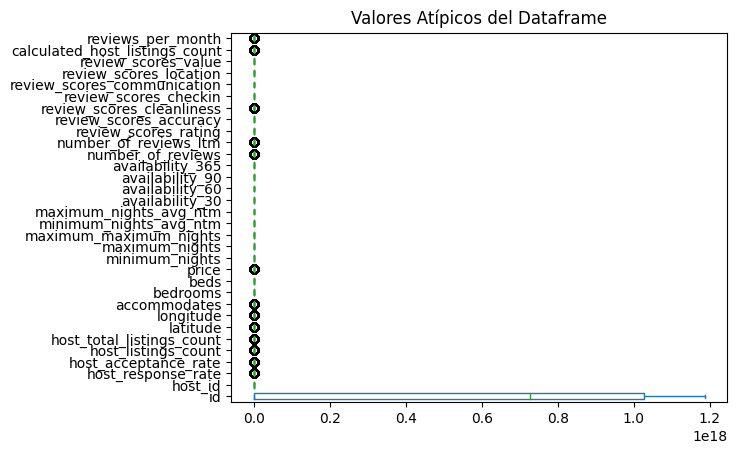

In [52]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_4_iqr.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

# Concatenamos DF´s

In [53]:
#Unimos el DF cuantitativo limpioo con el DF cualitativo, iqr

Datos_Limpios_iqr=pd.concat([cualitativas,data_4_iqr], axis=1)
Datos_Limpios_iqr.head()

,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,within an hour,Copacabana,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",...,23.0,4.71,4.77,4.64,4.84,4.91,4.77,4.67,1.0,1.88
1,Viviane,2010-04-03,"Rio de Janeiro, Brazil",within an hour,within an hour,Copacabana,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",...,23.0,4.73,4.71,4.79,4.82,4.92,4.84,4.62,1.0,1.70
2,Taciana,2011-09-11,Unknown location,within an hour,within an hour,Tijuca,['phone'],t,t,"Rio de Janeiro, Brazil",...,1.0,5.00,5.00,5.00,5.00,4.80,4.80,5.00,3.0,0.03
3,Patricia Miranda & Paulo,2010-06-27,"Rio de Janeiro, Brazil",within a few hours,within a few hours,Copacabana,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",...,4.7,4.91,4.94,4.92,4.97,4.95,4.94,4.89,1.0,0.80
4,❤️ BrUx ❤️,2011-04-12,"Rio de Janeiro, Brazil",within an hour,within an hour,Ipanema,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",...,17.0,4.81,4.83,4.74,4.95,4.98,4.97,4.73,7.0,0.80


In [54]:
#Unimos el DF cuantitativo limpio con el DF cualitativo, DesVest

Datos_Limpios_DesVest=pd.concat([cualitativas,data_clean],axis=1)
Datos_Limpios_DesVest.head()

,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,within an hour,Copacabana,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",...,23.0,4.71,4.77,4.64,4.84,4.91,4.77,4.67,1.0,1.88
1,Viviane,2010-04-03,"Rio de Janeiro, Brazil",within an hour,within an hour,Copacabana,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",...,23.0,4.73,4.71,4.79,4.82,4.92,4.84,4.62,1.0,1.70
2,Taciana,2011-09-11,Unknown location,within an hour,within an hour,Tijuca,['phone'],t,t,"Rio de Janeiro, Brazil",...,1.0,5.00,5.00,5.00,5.00,4.80,4.80,5.00,3.0,0.03
3,Patricia Miranda & Paulo,2010-06-27,"Rio de Janeiro, Brazil",within a few hours,within a few hours,Copacabana,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",...,36.0,4.91,4.94,4.92,4.97,4.95,4.94,4.89,1.0,2.85
4,❤️ BrUx ❤️,2011-04-12,"Rio de Janeiro, Brazil",within an hour,within an hour,Ipanema,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",...,17.0,4.81,4.83,4.74,4.95,4.98,4.97,4.73,7.0,3.04


In [55]:
Datos_Limpios_DesVest.to_csv('Datos_Limpios_DesVest.csv')

In [56]:
Datos_Limpios_iqr.to_csv('Datos_Limpios_iqr.csv')